In [1]:
import tensorflow as tf

tf.config.list_logical_devices('GPU')

[]

In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (valid_images, valid_label) = fashion_mnist.load_data()

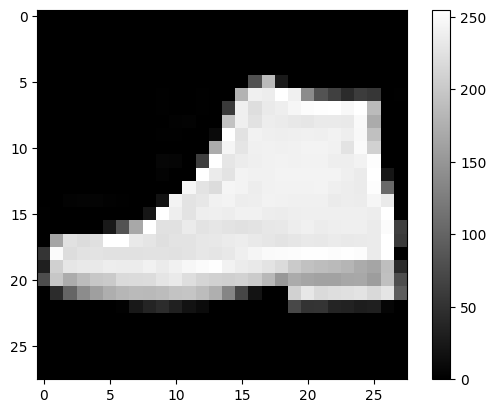

In [3]:
import matplotlib.pyplot as plt

data_idx = 42

plt.figure()
plt.imshow(train_images[data_idx], cmap='gray')
plt.colorbar()
plt.grid(False)
plt.show()

In [4]:
train_labels[data_idx]

9

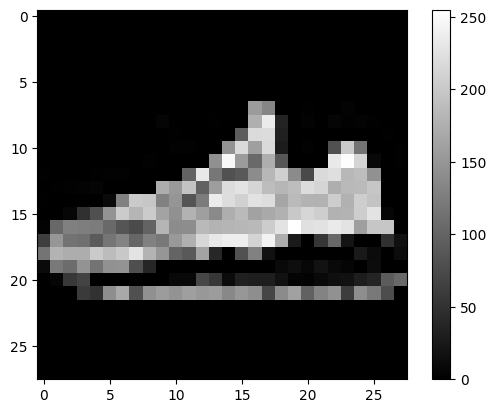

In [5]:
data_idx = 6174

plt.figure()
plt.imshow(valid_images[data_idx], cmap='gray')
plt.colorbar()
plt.grid(False)
plt.show()

In [6]:
valid_label[data_idx]

7

# Building a Neuron

In [7]:
# 28 lists with 28 values each
valid_images[data_idx]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [8]:
# We will also define an input_shape which is the dimensions of our data. In this case, our 28x28 pixels for each image.
number_of_classes = train_labels.max() + 1
number_of_classes

10

In [9]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(number_of_classes)
])

c:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


# Verifying the model

In [10]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │         7,850 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,850 (30.66 KB)

 Trainable params: 7,850 (30.66 KB)

 Non-trainable params: 0 (0.00 B)

We can see that our total parameter count is 7850. Let's see if this makes sense. For each pixel, there should be a weight for each of our ten classes.

In [11]:
image_height = 28
image_weight = 28

number_of_weights = image_height * image_weight * number_of_classes
number_of_weights

7840

So our weights make up 7,840 parameters. Where do the other ten come from? It's each of the 10 neurons biases, the b in y = mx + b.

There are a few other ways to verify our model. We can also plot it:

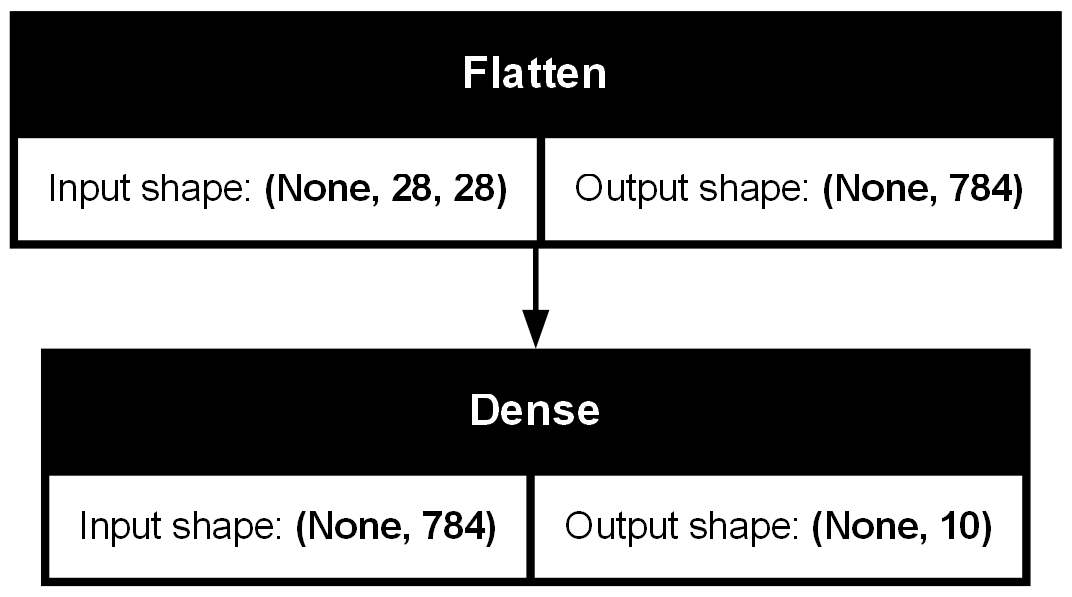

In [12]:
tf.keras.utils.plot_model(model, show_shapes=True)

# Initiate Training

In [13]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [14]:
history = model.fit(train_images,
                    train_labels,
                    epochs=5,
                    verbose=True,
                    validation_data=(valid_images, valid_label))

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.6803 - loss: 24.6720 - val_accuracy: 0.7669 - val_loss: 15.9219
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7907 - loss: 11.5824 - val_accuracy: 0.7879 - val_loss: 13.1246
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7935 - loss: 11.1741 - val_accuracy: 0.7289 - val_loss: 16.7172
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8005 - loss: 10.9991 - val_accuracy: 0.7832 - val_loss: 12.1819
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8033 - loss: 10.3240 - val_accuracy: 0.7718 - val_loss: 12.2950


# Prediction

In [15]:
model.predict(train_images[:10])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


array([[ -189.31146  ,  -547.71814  ,   -44.02823  ,  -265.22864  ,
         -254.48883  ,   436.61658  ,    20.248894 ,   338.97067  ,
          232.09586  ,   615.07495  ],
       [  432.03302  ,  -357.5027   ,   330.9624   ,   199.02498  ,
          122.57379  , -1074.1329   ,   290.79474  , -1790.6702   ,
           28.589523 ,  -815.05475  ],
       [  110.555084 ,   -34.823463 ,    94.11559  ,   134.95972  ,
          124.22608  ,  -361.30823  ,    89.789665 ,  -497.16797  ,
           -5.7405114,  -274.3519   ],
       [  250.98082  ,    10.434874 ,   272.77676  ,   273.6303   ,
          258.64346  ,  -560.01245  ,   269.24466  ,  -924.4531   ,
           74.30819  ,  -484.76666  ],
       [  256.8321   ,    62.931873 ,   230.89403  ,   306.5372   ,
          331.8162   ,  -693.1419   ,   224.51703  ,  -768.86017  ,
          148.01273  ,  -717.1142   ],
       [  299.03607  ,   -80.61921  ,   435.50952  ,    48.95019  ,
          449.8016   ,  -654.63226  ,   333.15396  , -141

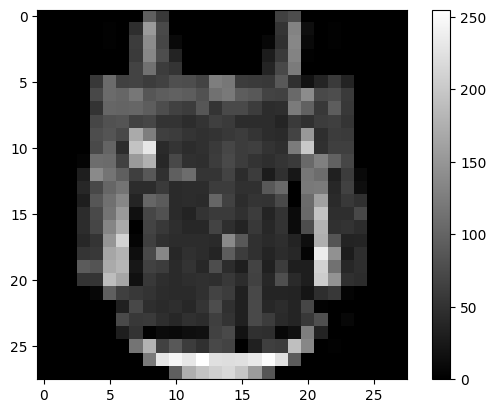

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step


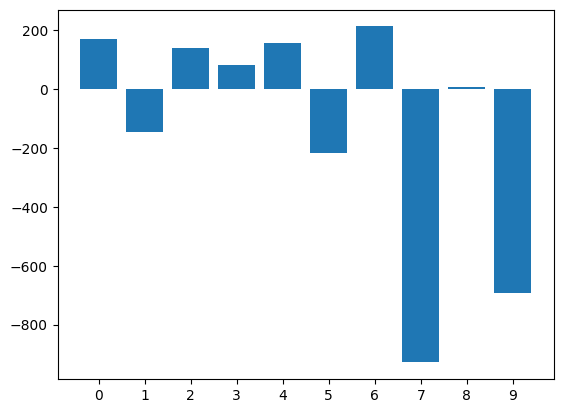

Correct answer:  6


In [16]:
data_idx = 8675

plt.figure()
plt.imshow(train_images[data_idx], cmap='gray')
plt.colorbar()
plt.grid(False)
plt.show()

x_values = range(number_of_classes)
plt.figure()
plt.bar(x_values, model.predict(train_images[data_idx: data_idx + 1])[0])
plt.xticks(range(10))
plt.show()

print("Correct answer: ", train_labels[data_idx])

# Conclusion

While this model does significantly better than random guessing, it has a way to go before it can beat humans at recognizing clothing.